In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This notebook will be for analysis of our dataset

In [143]:
file = pd.read_excel('Top_1000_IMDB_Movies_cleaned.xlsx')

file2 = pd.read_excel('clean_5k.xlsx')



Following will be the FAN FAVOURITE TOP 20 movies of all time


In [144]:
hit = file[file['Movie Rating']>8.6]
hit.sort_values(by = 'Movie Rating', ascending=False)
hit.head()

,Name of movie,Year of relase,Watchtime,Genre,PG_Rating,Movie Rating,Metascore,Votes,Gross collection,Description,Director,Star
0,The Shawshank Redemption,1994,142,Drama,R,9.3,81,"2,660,946",$28.34M,Two imprisoned men bond over a number of years...,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'..."
1,The Godfather,1972,175,"Crime, Drama",Not Rated,9.2,100,"1,844,072",$134.97M,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '..."
2,The Dark Knight,2008,152,"Action, Crime, Drama",PG-13,9.0,84,"2,633,886",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh..."
3,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",PG-13,9.0,94,"1,834,811",$377.85M,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell..."
4,Schindler's List,1993,195,"Biography, Drama, History",R,9.0,94,"1,347,685",$96.90M,"In German-occupied Poland during World War II,...",Steven Spielberg,"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley..."


Text(0.5, 1.0, 'Top 10 Movies with Max Rating')

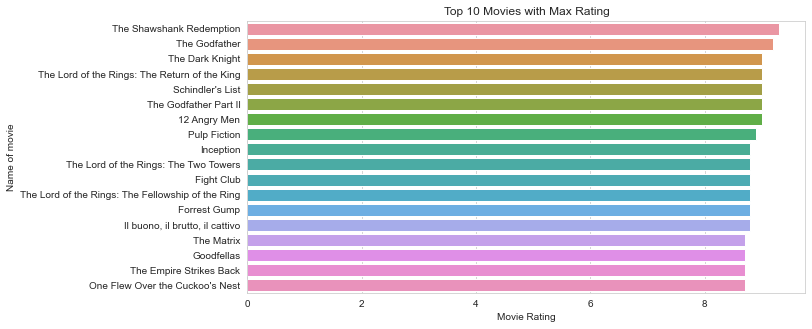

In [145]:
#visualize the movies with rating above 8.5
plt.figure(figsize=(10,5))
sns.barplot(x='Movie Rating', y='Name of movie', data=hit)
plt.title('Top 10 Movies with Max Rating')

C:\Users\MSLINK~1\AppData\Local\Temp/ipykernel_9360/1538844512.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Dominant Genre over the Decades')

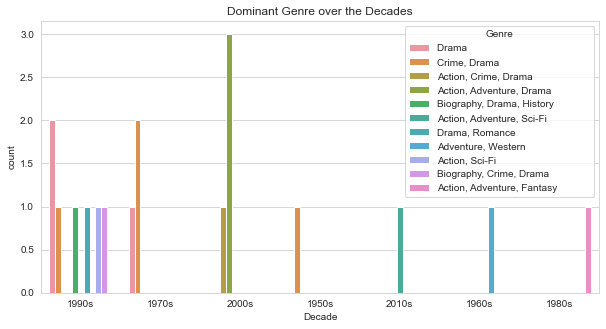

In [146]:
#analysing the count of genres in the dataset over the decades
#show the shift of trend in the genre of the movies from 1900s to 2010s
hit['Decade'] = hit['Year of relase'].apply(lambda x: str(x)[:3] + '0s')
hit.sort_values(by = 'Decade', ascending=True)
#visualize the dominant genre in the dataset over the decades
plt.figure(figsize=(10,5))
sns.countplot(x='Decade', hue='Genre', data=hit)
plt.title('Dominant Genre over the Decades')


Text(0.5, 1.0, 'Highest Rated R Rated Movies over the Decades')

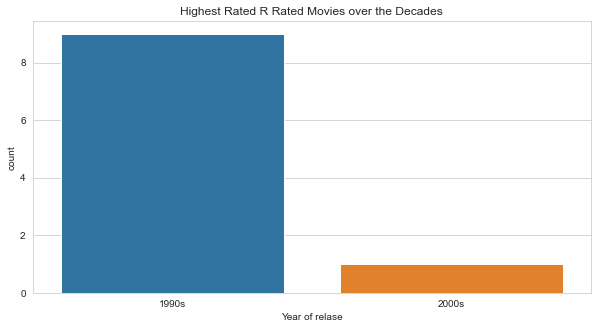

In [147]:
#counting the highest rated R rated movies
R = file[file['PG_Rating'] == 'R'].sort_values(by = 'Movie Rating', ascending=False).head(10)
# now find the ratio of the highest rated R rated movies to the time they were released
RT = R['Year of relase'].apply(lambda x: str(x)[:3] + '0s')
#see in which decade the highest rated R rated movies were released
plt.figure(figsize=(10,5))
sns.countplot(x=RT, data=R)
plt.title('Highest Rated R Rated Movies over the Decades')



It MEANS MOST OF THE R RATED MOVIES WERE PRODUCED AND RELEASED IN 1990'S


### Next Part
You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [148]:

Temp = file['Genre'].str.split(',', n = 1, expand = True)
Temp[1].fillna(Temp[0], inplace = True)

Temp

,0,1
0,Drama,Drama
1,Crime,Drama
2,Action,"Crime, Drama"
3,Action,"Adventure, Drama"
4,Biography,"Drama, History"
...,...,...
834,Comedy,"Drama, Romance"
835,Drama,"Romance, War"
836,Animation,"Adventure, Family"
837,Crime,"Mystery, Thriller"


In [149]:
movies = pd.concat([file,Temp],axis=1)
movies.rename(columns={0:'Genre1',1:'Genre2'},inplace=True)
movies.head()

,Name of movie,Year of relase,Watchtime,Genre,PG_Rating,Movie Rating,Metascore,Votes,Gross collection,Description,Director,Star,Genre1,Genre2
0,The Shawshank Redemption,1994,142,Drama,R,9.3,81,"2,660,946",$28.34M,Two imprisoned men bond over a number of years...,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Drama,Drama
1,The Godfather,1972,175,"Crime, Drama",Not Rated,9.2,100,"1,844,072",$134.97M,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",Crime,Drama
2,The Dark Knight,2008,152,"Action, Crime, Drama",PG-13,9.0,84,"2,633,886",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",Action,"Crime, Drama"
3,The Lord of the Rings: The Return of the King,2003,201,"Action, Adventure, Drama",PG-13,9.0,94,"1,834,811",$377.85M,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",Action,"Adventure, Drama"
4,Schindler's List,1993,195,"Biography, Drama, History",R,9.0,94,"1,347,685",$96.90M,"In German-occupied Poland during World War II,...",Steven Spielberg,"['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley...",Biography,"Drama, History"


In [150]:
movies.groupby(['Genre1','Genre2']).Metascore.mean().sort_values(ascending=False).head(5)

Genre1   Genre2                         
Drama     Film-Noir, Romance                100.0
Mystery   Romance, Thriller                 100.0
Drama     History                           100.0
Comedy    Musical, Romance                   99.0
Drama     Fantasy, War                       98.0
Name: Metascore, dtype: float64

### it shoes us that the top three BEST COMBINATION OF GENRE ARE

1) DRAMA, FILM-NOIR AND ROMANCE
2) MYSTERY , ROMANCE AND THRILLER
3) DRAMA AND HISTORY
4) COMEDY AND ROMANCE
5) FANTASY AND WAR

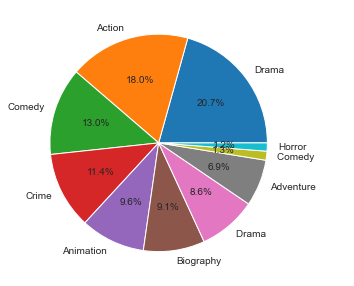

In [151]:
#analysing the count of genres in the dataset over the decades
movies['Decade'] = movies['Year of relase'].apply(lambda x: str(x)[:3] + '0s')
movies.sort_values(by = 'Decade', ascending=True)
#visualize the dominant genre in the dataset over the decades
#visualzing the top 10 most common genre in the dataset over the decades
plt.figure(figsize=(10,5))
plt.pie(movies['Genre1'].value_counts().head(10), labels=movies['Genre1'].value_counts().head(10).index, autopct='%1.1f%%')
plt.show()


In [152]:
#analyse the most common languages in the dataset
#count the most common language in the dataset
file2['language'].value_counts().head(10)

English      4613
French         72
Spanish        40
Hindi          28
Mandarin       26
German         19
Japanese       17
Russian        11
Cantonese      11
Italian        10
Name: language, dtype: int64

## English is the most popular language when it comes to watch movie

Text(0.5, 1.0, 'Top 10 Stars with most number of appearances in the dataset')

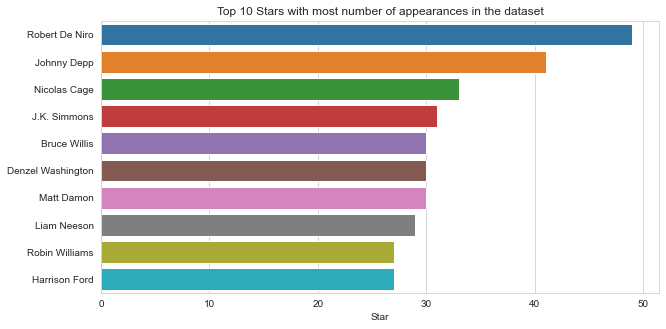

In [153]:
#finding the star with most number of appearances and the most hit movies in the dataset
file2['Star'].value_counts().head(10)
#visualize the top 10 stars with most number of appearances in the dataset
plt.figure(figsize=(10,5))
sns.barplot(x=file2['Star'].value_counts().head(10), y=file2['Star'].value_counts().head(10).index)
plt.title('Top 10 Stars with most number of appearances in the dataset')


### It shows that if there is Robert De Niro in the movie, it is a confirm hit

# Recommeding the movie based on the genre

In [154]:
#classifying the movies based on there genre and rating and then suggesting top 5 best movies based on genre
def movie_suggestor1():
    genre = input('Enter the genre: ')
    return recommend_movie(genre)
    
def recommend_movie(genre):
    movie = file2[(file2['Genre']==genre) & (movies['Movie Rating']>=5)]
    return movie.sort_values(by = 'imdb_score', ascending=False).head(3)


In [155]:
## the user can also enter the Watch time and the program will suggest a movie which is in 30 minutes range of the watch time
def movie_suggestor5():
    time = int(input('Enter the time: '))
    return recommend_movie2(time)
def recommend_movie2(time):
    movie = file[(file['Watchtime']>=time-15) & (file['Watchtime']<=time+15)]
    return movie.sort_values(by = 'Movie Rating', ascending=False).head(3)

In [156]:
# the user can also enter the name of the star and the program will suggest the top 5 movies based on the rating of the movies that star has acted in
def movie_suggestor2():
    star = input('Enter the name of the star: ')
    return recommend_movie3(star)

def recommend_movie3(star):
    movie = file2[file2['Star']==star]
    return movie.sort_values(by = 'imdb_score', ascending=False).head(3)

In [157]:
# the user can also enter the name of the director and the program will suggest the top 5 movies based on the rating of the movies that director has directed
def movie_suggestor3():
    director = input('Enter the name of the director: ')
    return recommend_movie4(director)

def recommend_movie4(director):
    movie = movies[movies['Director']==director]
    return movie.sort_values(by = 'Movie Rating', ascending=False).head(3)


In [158]:
# the user can also enter the name of the language and the program will suggest the top 5 movies based on the rating of the movies that are in that language
def movie_suggestor4():
    language = input('Enter the name of the language: ')
    return recommend_movie5(language)
def recommend_movie5(language):
    movie = file2[file2['language']==language]
    return movie.sort_values(by = 'imdb_score', ascending=False).head(3)

In [159]:
movie_suggestor1()

,Unnamed: 0,Director,Gross Collection,Genre,Star,Name of movie,Votes,language,budget,Year of release,imdb_score
3,4409,John Stockwell,4.846841e+07,Action,Matthew Ziff,Kickboxer: Vengeance,246,English,17000000.0,2016,9.1
156,855,Quentin Tarantino,7.009814e+07,Action,David Carradine,Kill Bill: Vol. 1,735784,English,30000000.0,2003,8.1


In [160]:
movie_suggestor2()

,Unnamed: 0,Director,Gross Collection,Genre,Star,Name of movie,Votes,language,budget,Year of release,imdb_score
13,683,David Fincher,37023395.0,Drama,Brad Pitt,Fight Club,1347461,English,63000000.0,1999,8.8
273,2898,Tony Scott,12281500.0,Action|Crime|Drama|Romance|Thriller,Brad Pitt,True Romance,163492,English,13000000.0,1993,8.0
361,101,David Fincher,127490802.0,Drama|Fantasy|Romance,Brad Pitt,The Curious Case of Benjamin Button,459346,English,150000000.0,2008,7.8


In [161]:
movie_suggestor3()

,Name of movie,Year of relase,Watchtime,Genre,PG_Rating,Movie Rating,Metascore,Votes,Gross collection,Description,Director,Star,Genre1,Genre2,Decade
2,The Dark Knight,2008,152,"Action, Crime, Drama",PG-13,9.0,84,"2,633,886",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",Action,"Crime, Drama",2000s
8,Inception,2010,148,"Action, Adventure, Sci-Fi",PG-13,8.8,74,"2,333,938",$292.58M,A thief who steals corporate secrets through t...,Christopher Nolan,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",Action,"Adventure, Sci-Fi",2010s
18,Interstellar,2014,169,"Adventure, Drama, Sci-Fi",PG-13,8.6,74,"1,806,810",$188.02M,A team of explorers travel through a wormhole ...,Christopher Nolan,"['Matthew McConaughey', 'Anne Hathaway', 'Jess...",Adventure,"Drama, Sci-Fi",2010s


In [162]:
movie_suggestor4()

,Unnamed: 0,Director,Gross Collection,Genre,Star,Name of movie,Votes,language,budget,Year of release,imdb_score
0,2765,John Blanchard,4.846841e+07,Comedy,Martin Short,Towering Inferno,10,English,NaN,1990,9.5
1,1937,Frank Darabont,2.834147e+07,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,English,25000000.0,1994,9.3
2,3466,Francis Ford Coppola,1.348220e+08,Crime|Drama,Al Pacino,The Godfather,1155770,English,6000000.0,1972,9.2


In [163]:
movie_suggestor5()

,Name of movie,Year of relase,Watchtime,Genre,PG_Rating,Movie Rating,Metascore,Votes,Gross collection,Description,Director,Star
16,The Empire Strikes Back,1980,124,"Action, Adventure, Fantasy",PG,8.7,82,"1,285,217",$290.48M,After the Rebels are brutally overpowered by t...,Irvin Kershner,"['Mark Hamill', 'Harrison Ford', 'Carrie Fishe..."
17,One Flew Over the Cuckoo's Nest,1975,133,Drama,Not Rated,8.7,84,"1,003,776",$112.00M,"In the Fall of 1963, a Korean War veteran and ...",Milos Forman,"['Jack Nicholson', 'Louise Fletcher', 'Michael..."
19,Cidade de Deus,2002,130,"Crime, Drama",R,8.6,79,"754,371",$7.56M,"In the slums of Rio, two kids' paths diverge a...","Directors:Fernando Meirelles, Kátia Lund","['Alexandre Rodrigues', 'Leandro Firmino', 'Ma..."
